# Jupyter Notebook for Task 1: Data Collection and Preparation

#### Import Libraries

In [23]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import ast
from datetime import timedelta
import json
import numpy as np
import pickle

## 1 Load and Explore Datasets

In [24]:
# Load csv-files independently of the operating system (mac or windows or linux) in a pandas dataframe
charging_data = pd.read_csv(os.path.join('Data', 'charging_sessions.csv')) # Create a pandas dataframe from the charging_sessions.csv file
weather_data = pd.read_csv(os.path.join('Data', 'weather_burbank_airport.csv')) # Create a pandas dataframe from the weather_burbank_airport.csv file

charging_data = charging_data.rename(columns={'Unnamed: 0': 'counter'}) # The first column in the csv-file is unnamed and appears to be a csv-counter, we decided to rename this column

In [25]:
# Get first information about the charging_data dataframe
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   counter           66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [26]:
# Get first information about the weather_data dataframe
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [27]:
# How do the charging_data rows look like?
charging_data.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [28]:
# How do the weather_data rows look like?
weather_data.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [29]:
# .describe() function only analyses numerical columns and gives the count, mean, standard deviation, min, max and the 3 quartiles (25%, 50%, 75%)
charging_data.describe()

,counter,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [30]:
# .describe() function only analyses numerical columns and gives the count, mean, standard deviation, min, max and the 3 quartiles (25%, 50%, 75%)
weather_data.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29219.000000,29224.000000,29236.000000,29158.000000,29244.000000,29218.000000
mean,17.885622,30.107993,986.879400,8.566568,0.059360,17.731433
std,6.454604,5.400388,3.607065,6.699889,0.471682,6.321100
min,2.000000,4.000000,971.000000,0.000000,0.000000,0.000000
25%,13.000000,26.000000,984.500000,6.000000,0.000000,13.000000
50%,17.000000,33.000000,986.480000,7.000000,0.000000,17.000000
75%,22.000000,34.000000,989.110000,13.000000,0.000000,22.000000
max,46.000000,47.000000,999.650000,57.000000,18.540000,42.000000


***

## 2 Data Preparation

The goal of data preparation is the creation of a clean, reliable and analysis-ready charging and weather dataset.

### 2.1 Identifying duplicates

To find duplicate entries in the charging_data DataFrame, we used Pandas' standard duplicate detection functions. Given the expectation of unique sessionID values for each charging session, this column was designated as the key for duplicate identification. </br>
This approach revealed 1413 duplicated rows, differing solely in the counter column. We then removed these redundant rows to ensure data integrity and prevent analytical bias.

In [31]:
charging_data_duplicates = charging_data.duplicated(subset='sessionID').sum()
weather_data_duplicates = weather_data.duplicated(subset='timestamp').sum()
# Display number of duplicate rows (if any)
print(f"Duplicate rows:\n charging data -> {charging_data_duplicates}\n weather data -> {weather_data_duplicates}")

Duplicate rows:
 charging data -> 1413
 weather data -> 0


In [32]:
# Display duplicate rows
charging_data[charging_data.duplicated(keep=False, subset='sessionID')].sort_values(by='id', ascending=True)

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
5573,0,5d2fbdd3f9af8b4d0dd0d54f,2019-07-02 00:32:46+00:00,2019-07-02 02:34:56+00:00,2019-07-02 01:46:09+00:00,2.463,1_1_193_827_2019-07-02 00:32:45.820079,1,AG-1F02,1-1-193-827,America/Los_Angeles,1117.0,"[{'WhPerMile': 200, 'kWhRequested': 4.0, 'mile..."
65037,8675,5d2fbdd3f9af8b4d0dd0d54f,2019-07-02 00:32:46+00:00,2019-07-02 02:34:56+00:00,2019-07-02 01:46:09+00:00,2.463,1_1_193_827_2019-07-02 00:32:45.820079,1,AG-1F02,1-1-193-827,America/Los_Angeles,1117.0,"[{'WhPerMile': 200, 'kWhRequested': 4.0, 'mile..."
65038,8676,5d310f54f9af8b52adda3e20,2019-07-02 12:15:28+00:00,2019-07-02 16:01:01+00:00,2019-07-02 16:01:38+00:00,12.891,1_1_194_818_2019-07-02 12:15:28.503952,1,AG-1F14,1-1-194-818,America/Los_Angeles,2834.0,"[{'WhPerMile': 273, 'kWhRequested': 19.11, 'mi..."
5574,1,5d310f54f9af8b52adda3e20,2019-07-02 12:15:28+00:00,2019-07-02 16:01:01+00:00,2019-07-02 16:01:38+00:00,12.891,1_1_194_818_2019-07-02 12:15:28.503952,1,AG-1F14,1-1-194-818,America/Los_Angeles,2834.0,"[{'WhPerMile': 273, 'kWhRequested': 19.11, 'mi..."
5575,2,5d310f54f9af8b52adda3e21,2019-07-02 12:42:49+00:00,2019-07-02 19:34:19+00:00,2019-07-02 16:21:21+00:00,13.734,1_1_178_828_2019-07-02 12:42:48.733464,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,1410,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
6984,1411,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
6985,1412,5d574ad2f9af8b4c10c03656,2019-07-31 19:21:47+00:00,2019-07-31 22:00:04+00:00,2019-07-31 20:51:34+00:00,0.897,1_1_178_817_2019-07-31 19:21:46.727697,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN


In [33]:
# Drop duplicate rows from dataframe charging_data
charging_data.drop_duplicates(subset='sessionID', keep='first', inplace=True)

### 2.2 Transform Datatypes

Format the datatypes of the different columns to those described in the Team Assignment or to those that make sense.

#### Charging Data

In [34]:
charging_data['connectionTime'] = pd.to_datetime(charging_data['connectionTime'])
charging_data['disconnectTime'] = pd.to_datetime(charging_data['disconnectTime'])
charging_data['doneChargingTime'] = pd.to_datetime(charging_data['doneChargingTime'])
charging_data['siteID'] = charging_data['siteID'].astype(str)
# We will transform the datatype of column userID and userInputs later, when handling missing data. This has some compatibility reasons.

# Team Assignment PDF: "All datetimes are in UTC (GMT) see timezone field for the correct timezone of the site."
# -> Therefore we have to convert the connectionTime, disconnectTime and doneChargingTime to timezone PST (pacific standard time) as the sites are located in Los Angeles.
charging_data['connectionTime'] = charging_data['connectionTime'].dt.tz_convert(tz='America/Los_Angeles')
charging_data['disconnectTime'] = charging_data['disconnectTime'].dt.tz_convert(tz='America/Los_Angeles')
charging_data['doneChargingTime'] = charging_data['doneChargingTime'].dt.tz_convert(tz='America/Los_Angeles')
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype                              
---  ------            --------------  -----                              
 0   counter           65037 non-null  int64                              
 1   id                65037 non-null  object                             
 2   connectionTime    65037 non-null  datetime64[ns, America/Los_Angeles]
 3   disconnectTime    65037 non-null  datetime64[ns, America/Los_Angeles]
 4   doneChargingTime  60950 non-null  datetime64[ns, America/Los_Angeles]
 5   kWhDelivered      65037 non-null  float64                            
 6   sessionID         65037 non-null  object                             
 7   siteID            65037 non-null  object                             
 8   spaceID           65037 non-null  object                             
 9   stationID         65037 non-null  object                          

In [35]:
# The offset of the columns connectionTime, disconnectTime and doneChargingTime is now -08:00 or -07:00 (summer) which is correct for timezone PST (Los Angeles)
charging_data.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [36]:
# # Transforming the json-Strings in the userInputs column to Dataframes
# # Notice: may take about 1-2 minutes
# def parse_json_to_dataframe(json_string):
#     if json_string is not None and json_string != '' and type(json_string) == str:
#         cleaned_json = json_string.replace("'", '"')
#         cleaned_json = cleaned_json.replace("True", '"True"')
#         cleaned_json = cleaned_json.replace("False", '"False"')
#         data = json.loads(cleaned_json)
#         dataframe = pd.DataFrame(data)
#         #might as well just transform the date columns to the correct datatypes
#         dataframe['modifiedAt'] = pd.to_datetime(dataframe['modifiedAt'], format='%a, %d %b %Y %H:%M:%S %Z')
#         dataframe['modifiedAt'] = dataframe['modifiedAt'].dt.tz_convert(tz='America/Los_Angeles')
#         dataframe['requestedDeparture'] = pd.to_datetime(dataframe['requestedDeparture'], format='%a, %d %b %Y %H:%M:%S %Z')
#         dataframe['requestedDeparture'] = dataframe['requestedDeparture'].dt.tz_convert(tz='America/Los_Angeles')
#         return dataframe
#     else:
#         return None
#
#
# charging_data['userInputs'] = charging_data['userInputs'].apply(parse_json_to_dataframe)

In [37]:
# check inner Dataframe
dftest = charging_data[charging_data['userInputs'].notnull()]
# dftest[3]
x = 2000
print(dftest[['connectionTime', 'disconnectTime', 'doneChargingTime', 'kWhDelivered']].iloc[x])
print(dftest['userInputs'].iloc[x])

connectionTime      2020-02-12 05:59:34-08:00
disconnectTime      2020-02-12 14:40:15-08:00
doneChargingTime    2020-02-12 09:11:41-08:00
kWhDelivered                            7.043
Name: 2046, dtype: object
[{'WhPerMile': 467, 'kWhRequested': 9.34, 'milesRequested': 20, 'minutesAvailable': 232, 'modifiedAt': 'Wed, 12 Feb 2020 13:59:35 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 12 Feb 2020 17:51:34 GMT', 'userID': 4147}]


**Check the importance of UserInput**

In [38]:
extracted_data = []

# Go through each row in the DataFrame and process the userInputs column
for index, row in dftest.iterrows():
    user_input_str = row['userInputs']

    try:
        # Conversion of the string into a list of dictionaries
        user_input_data = ast.literal_eval(user_input_str)

        for item in user_input_data:
            # Extract the desired values or set to 0 if the value is not available
            extracted_data.append({
                'WhPerMile': item.get('WhPerMile', 0),
                'kWhRequested': item.get('kWhRequested', 0),
                'milesRequested': item.get('milesRequested', 0),
                'minutesAvailable': item.get('minutesAvailable', 0),
                'modifiedAt': item.get('modifiedAt', 0),
                'paymentRequired': item.get('paymentRequired', 0),
                'requestedDeparture': item.get('requestedDeparture', 0),
                'userIDInput': item.get('userID', 0),
            })

    except Exception as e:
        # If errors occur, set empty rows to 0
        extracted_data.append({
            'WhPerMile': 0,
            'kWhRequested': 0,
            'milesRequested': 0,
            'minutesAvailable': 0,
            'modifiedAt': 0,
            'paymentRequired': 0,
            'requestedDeparture': 0,
            'userIDInput': 0
        })

# Create a copy of the original DataFrame to make analysis later and not interfere with original data
charging_data_copy = charging_data.copy()

# Save the extracted data in a new DataFrame
extracted_df = pd.DataFrame(extracted_data)

# Add the extracted DataFrame to the copied DataFrame
charging_data_copy = pd.concat([charging_data_copy, extracted_df], axis=1)

# Remove the 'userInputs' column from the copy
charging_data_copy = charging_data_copy.drop(columns=['userInputs'])

# Count how much data has been extracted
num_extracted_data = len(extracted_data)
print(f"Number of extracted data entries: {num_extracted_data}")

# Check the copy
print(charging_data_copy.head())
charging_data_copy.info()


Number of extracted data entries: 61663
   counter                        id            connectionTime  \
0        0  5e23b149f9af8b5fe4b973cf 2020-01-02 05:08:54-08:00   
1        1  5e23b149f9af8b5fe4b973d0 2020-01-02 05:36:50-08:00   
2        2  5e23b149f9af8b5fe4b973d1 2020-01-02 05:56:35-08:00   
3        3  5e23b149f9af8b5fe4b973d2 2020-01-02 05:59:58-08:00   
4        4  5e23b149f9af8b5fe4b973d3 2020-01-02 06:00:01-08:00   

             disconnectTime          doneChargingTime  kWhDelivered  \
0 2020-01-02 11:11:15-08:00 2020-01-02 09:31:35-08:00        25.016   
1 2020-01-02 14:38:21-08:00 2020-01-02 12:18:05-08:00        33.097   
2 2020-01-02 16:39:22-08:00 2020-01-02 08:35:06-08:00         6.521   
3 2020-01-02 08:38:39-08:00 2020-01-02 07:18:45-08:00         2.355   
4 2020-01-02 14:08:40-08:00 2020-01-02 10:17:30-08:00        13.375   

                                sessionID siteID  spaceID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034      1  AG-3F30  1-1

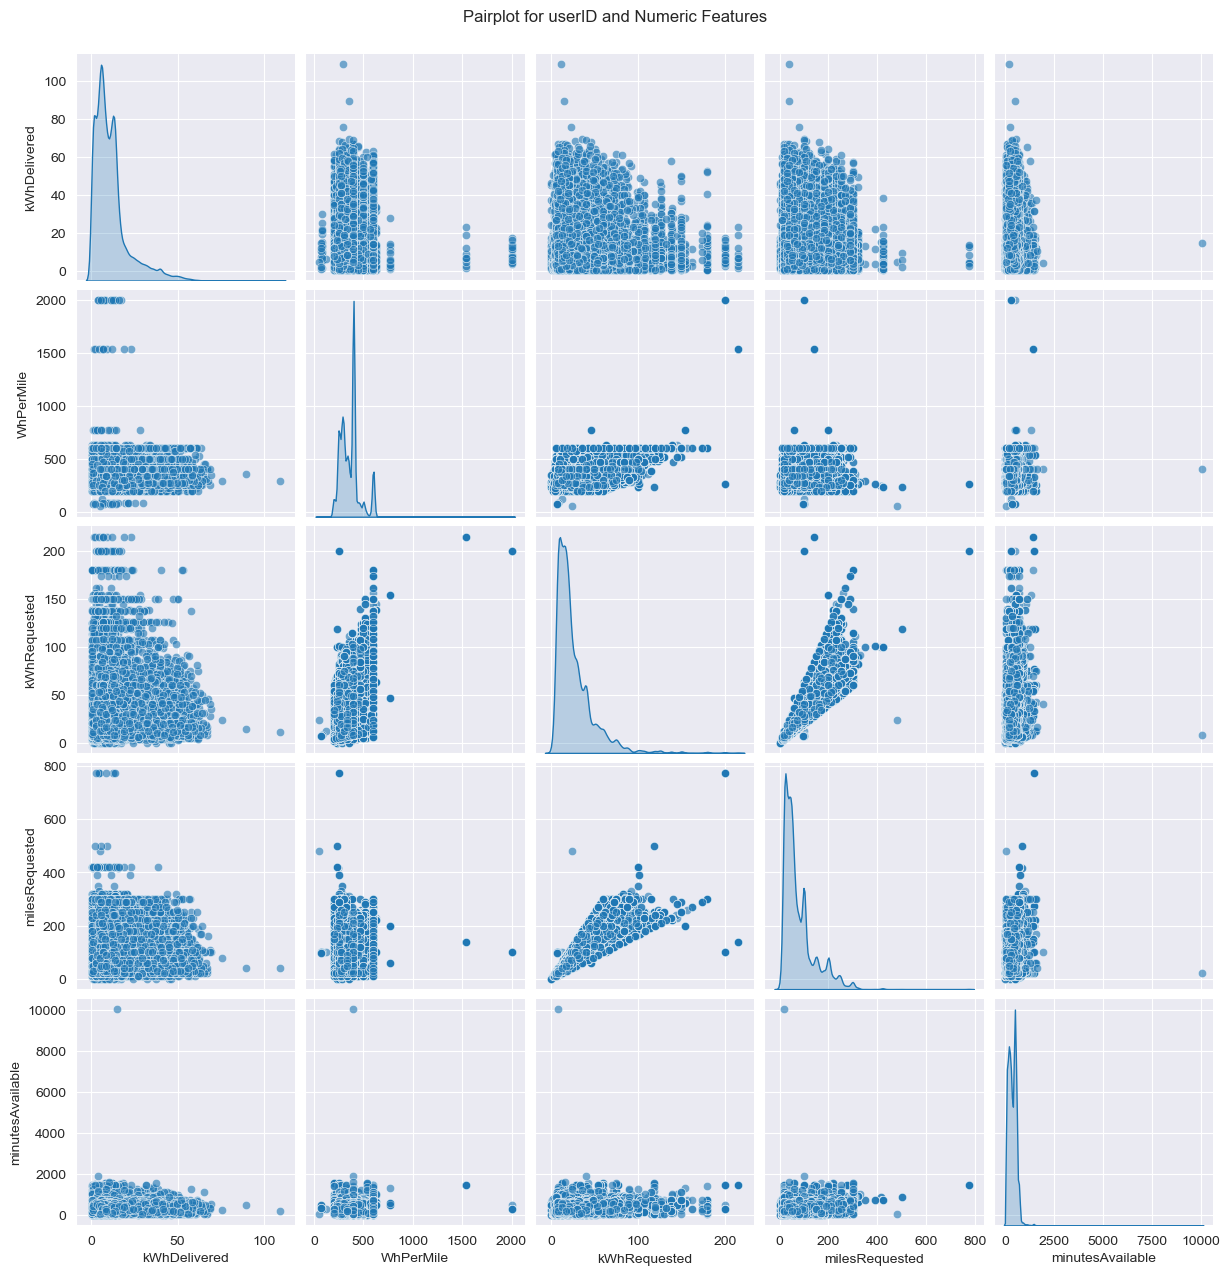

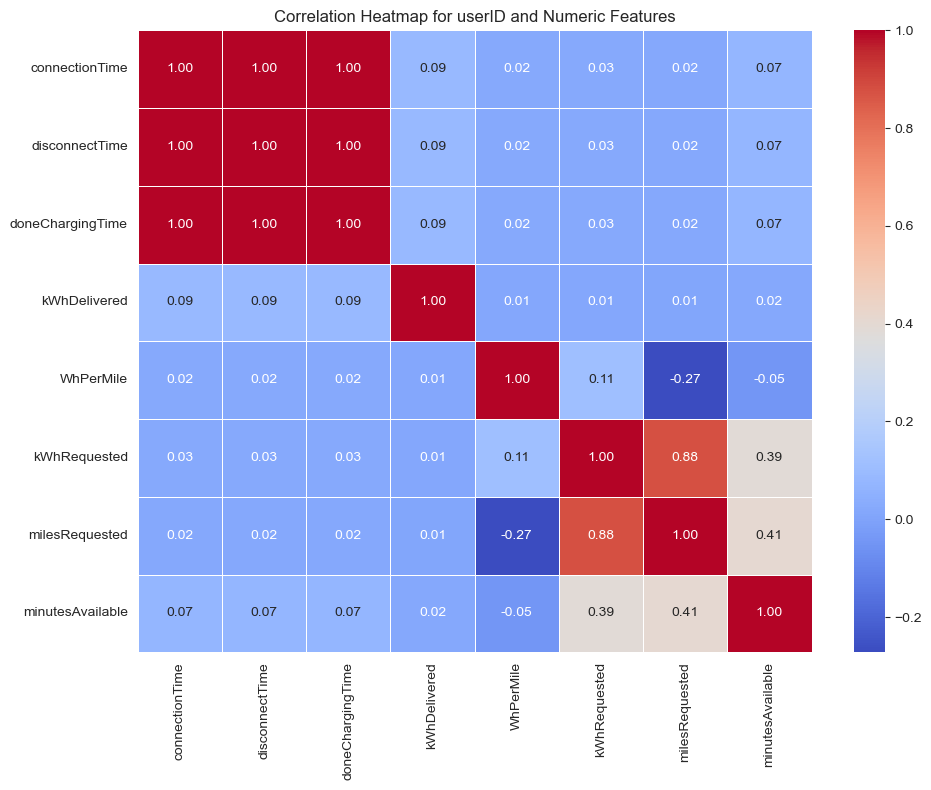

In [39]:
# Pairplot for UserID and numerical features
numerical_columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'kWhDelivered', 'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable']
pairplot_data = charging_data_copy[numerical_columns].dropna()

# Create pairplot
sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot for userID and Numeric Features", y=1.02)
plt.show()

# Calculate correlation matrix
correlation_matrix = pairplot_data.corr()

# Create heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for userID and Numeric Features")
plt.tight_layout()
plt.show()

**Removal of userInputs**

**Lack of correlation:**
The user inputs such as WhPerMile, kWhRequested, milesRequested and minutesAvailable show no significant correlation with the charging variables such as connectionTime, doneChargingTime or kWhDelivered. As a result, they do not make a relevant contribution to the investigation of the relationships between the charging parameters.

As expected, the only exceptions are the user inputs kWhRequested and milesRequested, which correlate with each other due to their functional relationship. This correlation is logical, as the requested energy is directly linked to the planned route. Nevertheless, these variables have no direct relevance for the actual analysis of the charging process.

Additionally more than 17.000 chargingSessions do not even supply extra userInputs.

In [40]:
# Drop the userInputs
charging_data.drop(columns=['userInputs'], inplace=True)

#### Weather Data

In [41]:
# Additionally we localize the weather data, so that the datetime columns in both datasets have the same timezone and are compatible
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])
weather_data['timestamp'] = weather_data['timestamp'].dt.tz_localize(tz='America/Los_Angeles', nonexistent='shift_forward', ambiguous='NaT')
weather_data.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00-08:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00-08:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00-08:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00-08:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00-08:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [42]:
# While performing the timezone localize to the weather data, we faced an AmbiguousTimeError which occurs because of an issue with converting timezone-aware datetime values.
# For example, during the transition from DST (Daylight Saving Time) to standard time, an hour gets repeated, making times like 2018-11-04 01:53:00 ambiguous (it could occur in either DST or standard time).
# Therefore, we decided to use the parameters nonexistent='shift_forward' and ambiguous='NaT' of the function tz_localize which deals with this issue. It replaced 3 timestamps with 'NaT' (Not a Time) which we will drop from the weather dataset.
nat_records = weather_data[pd.isna(weather_data['timestamp'])]
nat_records

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
8077,Burbank,NaT,26.0,33.0,Fair,985.49,7.0,0.0,26.0
18030,Burbank,NaT,23.0,27.0,Mostly Cloudy,986.81,7.0,0.0,23.0
27704,Burbank,NaT,25.0,33.0,Fair,987.80,9.0,0.0,26.0


In [43]:
# Drop 3 NaT records
print(f"Number of rows in weather dataset before drop: {weather_data.shape[0]}")
weather_data = weather_data.dropna(subset=['timestamp'])
print(f"Number of rows in weather dataset after drop: {weather_data.shape[0]}")
# Initially 29244 and now 29241 -> correct

Number of rows in weather dataset before drop: 29244
Number of rows in weather dataset after drop: 29241


### 2.3 Identifying missing data

First visualization of both datasets

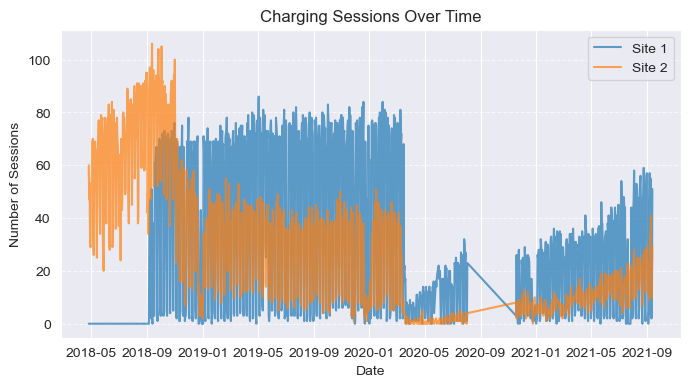

In [44]:
# Extract date for grouping
charging_data['connection_date'] = charging_data['connectionTime'].dt.date

# Aggregate charging sessions per day
charging_sessions_per_day = charging_data.groupby(['connection_date', 'siteID']).size().unstack(fill_value=0)

# Plot charging sessions over time
plt.figure(figsize=(8, 4))
for siteID in charging_sessions_per_day.columns:
    charging_sessions_per_day[siteID].plot(label=f'Site {siteID}', alpha=0.7)
plt.title('Charging Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

First visual observations: </br>
- data records of site 1 start at approx. September 2018
- data records of site 2 start at approx. May 2018 (about 4 months earlier than site 1)
- timeframe between approx. August 2020 and December 2020 missing
- crash for amount of charging sessions per day at the start of the COVID19 pandemic (March 2020) because of lockdowns

In [45]:
# Add a column for month and year
charging_data['year_month'] = charging_data['connectionTime'].dt.to_period('M')

# Group by month and count records
monthly_counts = charging_data.groupby('year_month').size()

# Display the counts for visual inspection
monthly_counts

# The UserWarning about dropping timezone information is not a problem in this case

C:\Users\timon\AppData\Local\Temp\ipykernel_24616\2080109559.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  charging_data['year_month'] = charging_data['connectionTime'].dt.to_period('M')


year_month
2018-04     270
2018-05    1776
2018-06    1845
2018-07    2053
2018-08    2430
2018-09    3190
2018-10    3980
2018-11    2593
2018-12    1930
2019-01    2360
2019-02    2222
2019-03    2353
2019-04    2559
2019-05    2608
2019-06    2267
2019-07    2309
2019-08    2369
2019-09    2250
2019-10    2602
2019-11    2123
2019-12    1997
2020-01    2300
2020-02    2249
2020-03    1216
2020-04     225
2020-05     268
2020-06     411
2020-07     552
2020-08      30
2020-11     209
2020-12     581
2021-01     679
2021-02     747
2021-03     915
2021-04     971
2021-05    1006
2021-06    1246
2021-07    1035
2021-08    1628
2021-09     683
Freq: M, dtype: int64

Observations: </br>
- Notably more charging sessions in 2018 and 2019, especially in summer months (pre-covid)
- Much less charging sessions during covid pandemic
- Did not reach old levels after pandemic start

In [46]:
# Identify the first element (connectionTime) per site
first_element_per_site = charging_data.groupby('siteID')['connectionTime'].min()
first_element_per_site

siteID
1   2018-09-05 04:04:13-07:00
2   2018-04-25 04:08:04-07:00
Name: connectionTime, dtype: datetime64[ns, America/Los_Angeles]

In [47]:
# Identify the last element (connectionTime) per site
last_element_per_site = charging_data.groupby('siteID')['connectionTime'].max()
last_element_per_site

siteID
1   2021-09-13 22:43:39-07:00
2   2021-09-13 18:52:37-07:00
Name: connectionTime, dtype: datetime64[ns, America/Los_Angeles]

Observations:
- Charging data ranges from 25th April 2018 (site 2) & 5th September 2018 (site 1) to 13th September 2021 (both sites)
- Data for site 1 starts 133 days after site 2

In [48]:
# Look at the missing timeframe between approx. August and December 2020
filtered_data = charging_data[
    (charging_data['connectionTime'] >= '2020-08-01') &
    (charging_data['connectionTime'] <= '2020-12-01')
].copy()

# Group by date and get the last record for each date
last_records_per_date = filtered_data.groupby(['siteID', 'connection_date']).tail(1)
last_records_per_date.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,connection_date,year_month
5024,5024,5f3b210cf9af8b0a6d10cbf3,2020-08-01 10:58:21-07:00,2020-08-01 16:11:54-07:00,2020-08-01 13:56:04-07:00,8.599,1_1_191_792_2020-08-01 17:58:21.088227,1,AG-4F37,1-1-191-792,America/Los_Angeles,76.0,2020-08-01,2020-08
5025,5025,5f3c728df9af8b0c7b9c8a8a,2020-08-02 10:49:33-07:00,2020-08-02 15:56:36-07:00,2020-08-02 13:51:52-07:00,8.812,1_1_191_792_2020-08-02 17:49:33.364151,1,AG-4F37,1-1-191-792,America/Los_Angeles,76.0,2020-08-02,2020-08
5048,5048,5f3dc41bf9af8b0e903d4335,2020-08-03 14:43:29-07:00,2020-08-03 17:30:15-07:00,2020-08-03 17:30:10-07:00,5.516,1_1_193_827_2020-08-03 21:43:29.408907,1,AG-1F02,1-1-193-827,America/Los_Angeles,405.0,2020-08-03,2020-08
5051,5051,5fdd5806f9af8b16e6675e23,2020-11-18 23:04:36-08:00,2020-11-19 01:02:41-08:00,2020-11-19 00:47:26-08:00,5.293,1_1_178_823_2020-11-19 07:04:35.937413,1,AG-1F08,1-1-178-823,America/Los_Angeles,405.0,2020-11-18,2020-11
5077,5077,5fdd5806f9af8b16e6675e3c,2020-11-19 15:14:30-08:00,2020-11-19 17:19:36-08:00,2020-11-19 17:06:16-08:00,6.306,1_1_191_792_2020-11-19 23:14:30.011951,1,AG-4F37,1-1-191-792,America/Los_Angeles,5015.0,2020-11-19,2020-11


Final observation after looking at the filtered dataset: There is no charging data between 3rd August 2020 and 18th November 2020 for both sites.

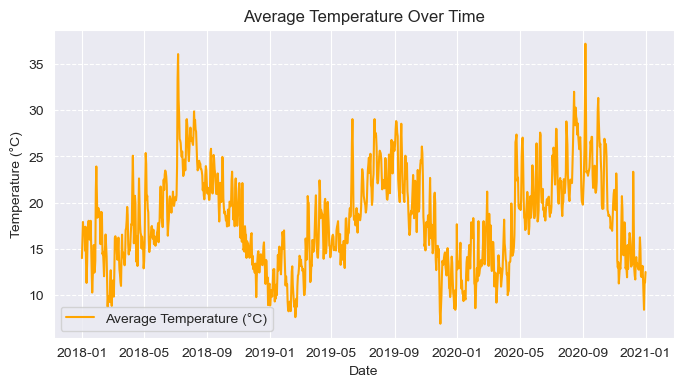

In [49]:
# Plot average temperature over time
weather_data['weather_date'] = weather_data['timestamp'].dt.date

average_temperature_per_day = weather_data.groupby('weather_date')['temperature'].mean()

plt.figure(figsize=(8, 4))
average_temperature_per_day.plot(label='Average Temperature (°C)', color='orange')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

In [50]:
# Identify the first and last element (timestamp)
first_weather_element = weather_data['timestamp'].min()
last_weather_element = weather_data['timestamp'].max()
print(f"Frist weather record: {first_weather_element}")
print(f"Last weather record: {last_weather_element}")

Frist weather record: 2018-01-01 08:53:00-08:00
Last weather record: 2021-01-01 07:53:00-08:00


Observations:
- Weather data ranges from 01-01-2018 to 01-01-2021
- no area missing inbetween

In [51]:
# Identify missing data in charging dataset by using .isnull()
charging_missing_data = charging_data.isnull().sum()
charging_missing_data[charging_missing_data > 0]

doneChargingTime     4087
userID              17215
dtype: int64

In [52]:
# Identify missing data in weather dataset by using .isnull()
weather_missing_data = weather_data.isnull().sum()
weather_missing_data[weather_missing_data > 0]

temperature                25
cloud_cover                20
cloud_cover_description    20
pressure                    8
windspeed                  86
felt_temperature           26
dtype: int64

In [53]:
# How many unique lines are having missing values in the weather dataset?
print("Number of unique lines with missing values: " + str(weather_data.isnull().any(axis=1).sum()))

Number of unique lines with missing values: 139


For reference: </br>
- The charging dataset has 65037 records
- The weather dataset has 29241 records

**Let's look at the missing values:**<br>
For `charging_data`:
- `doneChargingTime`: We have 4087 missing values, that is 4087/65037 = 6,28% of the data set. We will drop them from our dataset (further reasons below).
- `userID`: We have 17215 missing values, that is 17215/65037 = 26,47% of the dataset. We will replace them with empty string values.
- userInput: **!!!!!111TODO!!!:** We have 17215 missing values, that is 17215/65037 = 26,47% of the dataset. This correlates with the missing userIDs. We will replace them with 0.

For `weather_data`:
- There are 139 unique lines with missing values in the data set. Because this is only 139/29241 = 0,47% of the dataset, we decided to drop these records.

### 2.4 Handling missing data

#### Charging Data

In [54]:
# Quick overview - where do we stand?
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype                              
---  ------            --------------  -----                              
 0   counter           65037 non-null  int64                              
 1   id                65037 non-null  object                             
 2   connectionTime    65037 non-null  datetime64[ns, America/Los_Angeles]
 3   disconnectTime    65037 non-null  datetime64[ns, America/Los_Angeles]
 4   doneChargingTime  60950 non-null  datetime64[ns, America/Los_Angeles]
 5   kWhDelivered      65037 non-null  float64                            
 6   sessionID         65037 non-null  object                             
 7   siteID            65037 non-null  object                             
 8   spaceID           65037 non-null  object                             
 9   stationID         65037 non-null  object                          

In [55]:
# Make a copy to avoid modifying the original DataFrame
charging_data_cleaned = charging_data.copy()

**Delete all data records where doneChargingTime is empty**
* At first we wanted to fill the empty doneChargingTime fields with _connectionTime + median charging time_, but this resulted in a kind of bias for the 4087 (65037-60950) records (which we only noticed later in our cluster analysis)
* In conclusion we decided to drop all records where doneChargingTime is empty because estimating a possible and sensible doneChargingTime was not quite possible and setting the doneChargingTime to disconnectTime didn't seem to make sense to us either

In [56]:
# Delete all data records where doneChargingTime is empty
charging_data_cleaned = charging_data_cleaned[charging_data_cleaned['doneChargingTime'].notna()]

In [57]:
charging_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60950 entries, 0 to 65036
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype                              
---  ------            --------------  -----                              
 0   counter           60950 non-null  int64                              
 1   id                60950 non-null  object                             
 2   connectionTime    60950 non-null  datetime64[ns, America/Los_Angeles]
 3   disconnectTime    60950 non-null  datetime64[ns, America/Los_Angeles]
 4   doneChargingTime  60950 non-null  datetime64[ns, America/Los_Angeles]
 5   kWhDelivered      60950 non-null  float64                            
 6   sessionID         60950 non-null  object                             
 7   siteID            60950 non-null  object                             
 8   spaceID           60950 non-null  object                             
 9   stationID         60950 non-null  object                          

In [58]:
# Fill userID with empty String values
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].fillna(0)
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].astype(int)
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].replace(0, '')
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].astype(str)

# charging_data_cleaned['userInputs'] = charging_data_cleaned['userInputs'].fillna('0')

print(f"Amount of null-Values should be equal to 16306 (=60950-44644) missing userIDs, amount of null-values: {charging_data_cleaned[charging_data_cleaned['userID'] == ''].shape[0]}")

Amount of null-Values should be equal to 16306 (=60950-44644) missing userIDs, amount of null-values: 16306


#### Weather Data

In [59]:
# Make a copy to avoid modifying the original DataFrame
weather_data_cleaned = weather_data.copy()

# Drop lines with missing values (139 unique lines which we observed earlier)
weather_data_cleaned = weather_data_cleaned.dropna()

In [60]:
weather_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29102 entries, 0 to 29243
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype                              
---  ------                   --------------  -----                              
 0   city                     29102 non-null  object                             
 1   timestamp                29102 non-null  datetime64[ns, America/Los_Angeles]
 2   temperature              29102 non-null  float64                            
 3   cloud_cover              29102 non-null  float64                            
 4   cloud_cover_description  29102 non-null  object                             
 5   pressure                 29102 non-null  float64                            
 6   windspeed                29102 non-null  float64                            
 7   precipitation            29102 non-null  float64                            
 8   felt_temperature         29102 non-null  float64                       

***

## 3 Erroneous Data

In [61]:
# Check whether disconnectTime is before connectionTime
disconnectBeforeConnect = charging_data_cleaned[charging_data_cleaned['disconnectTime'] < charging_data_cleaned['connectionTime']]
print(f"Number of rows where disconnectTime is before connectionTime: {disconnectBeforeConnect.shape[0]}")
display(disconnectBeforeConnect[['connectionTime', 'disconnectTime']])

Number of rows where disconnectTime is before connectionTime: 0


,connectionTime,disconnectTime


Observation: There are no records where disconnectTime is after connectionTime

In [62]:
# Check whether doneChargingTime is before connectionTime
doneBeforeConnection = charging_data_cleaned[charging_data_cleaned['doneChargingTime'] < charging_data_cleaned['connectionTime']]
print(f"Number of rows where doneChargingTime is before connectionTime: {doneBeforeConnection.shape[0]}")
display(doneBeforeConnection[['connectionTime', 'doneChargingTime']].head())

Number of rows where doneChargingTime is before connectionTime: 27


,connectionTime,doneChargingTime
22219,2019-03-05 11:13:55-08:00,2019-03-05 11:12:56-08:00
22253,2019-03-06 12:26:30-08:00,2019-03-06 12:25:34-08:00
23562,2019-04-15 13:24:13-07:00,2019-04-15 13:23:14-07:00
23586,2019-04-16 09:11:08-07:00,2019-04-16 09:10:11-07:00
27689,2019-09-04 09:35:04-07:00,2019-09-04 09:34:05-07:00


Observation: There are 27 records where doneChargingTime is before connectionTime, which seems contradictory. We decided to drop these records.

In [63]:
# Drop the records where doneChargingTime is before connectionTime
charging_data_cleaned.drop(charging_data_cleaned[charging_data_cleaned['doneChargingTime'] < charging_data_cleaned['connectionTime']].index, inplace=True)

# TODO: müssen wir das immer verifyen?
# Verify that there are no more records where doneChargingTime is before connectionTime
doneCharging_before_connection = charging_data_cleaned[charging_data_cleaned['doneChargingTime'] < charging_data_cleaned['connectionTime']]
print(f"Number of records where doneChargingTime is before connectionTime: {doneCharging_before_connection.shape[0]}")

Number of records where doneChargingTime is before connectionTime: 0


In [64]:
# Calculate the charging duration (doneChargingTime - connectionTime) in minutes
charging_data_cleaned['charging_duration'] = ((charging_data_cleaned['doneChargingTime'] - charging_data_cleaned[
    'connectionTime']).dt.total_seconds()) / 60

# Calculate the connection duration (disconnectTime - connectionTime) in minutes
charging_data_cleaned['connection_duration'] = ((charging_data_cleaned['disconnectTime'] - charging_data_cleaned[
    'connectionTime']).dt.total_seconds()) / 60

In [65]:
# Check whether the doneChargingTime is after disconnectTime
doneAfterDisconnect = charging_data_cleaned[charging_data_cleaned['doneChargingTime'] > charging_data_cleaned['disconnectTime']]
print(f"Number of rows where doneChargingTime is after disconnectTime: {doneAfterDisconnect.shape[0]}")
doneAfterDisconnect[['connectionTime', 'disconnectTime', 'doneChargingTime', 'charging_duration', 'connection_duration']]

Number of rows where doneChargingTime is after disconnectTime: 4387


,connectionTime,disconnectTime,doneChargingTime,charging_duration,connection_duration
12,2020-01-02 07:04:38-08:00,2020-01-02 14:08:39-08:00,2020-01-02 14:09:36-08:00,424.966667,424.016667
20,2020-01-02 07:28:47-08:00,2020-01-02 11:01:54-08:00,2020-01-02 11:02:51-08:00,214.066667,213.116667
25,2020-01-02 07:42:05-08:00,2020-01-02 13:58:45-08:00,2020-01-02 13:59:42-08:00,377.616667,376.666667
26,2020-01-02 07:57:24-08:00,2020-01-02 08:35:37-08:00,2020-01-02 08:36:34-08:00,39.166667,38.216667
33,2020-01-02 08:34:35-08:00,2020-01-02 10:49:41-08:00,2020-01-02 10:50:38-08:00,136.050000,135.100000
...,...,...,...,...,...
65028,2019-07-01 12:20:31-07:00,2019-07-01 17:16:32-07:00,2019-07-01 17:16:42-07:00,296.183333,296.016667
65030,2019-07-01 13:01:07-07:00,2019-07-01 17:32:26-07:00,2019-07-01 17:32:59-07:00,271.866667,271.316667
65033,2019-07-01 14:58:45-07:00,2019-07-01 17:39:48-07:00,2019-07-01 17:40:21-07:00,161.600000,161.050000
65034,2019-07-01 15:02:21-07:00,2019-07-01 17:58:50-07:00,2019-07-01 17:59:23-07:00,177.033333,176.483333


From what we visually observed, we noticed that in those cases where the doneChargingTime is after disconnectTime it is usually only 1-2 minutes or even seconds later. Therefore, we decided to set the doneChargingTime to the disconnectTime in those cases.

In [66]:
# Identify records where doneChargingTime is already equal to disconnectTime
pre_existing_equal_times = charging_data_cleaned[charging_data_cleaned['doneChargingTime'] == charging_data_cleaned['disconnectTime']]
print(f"Number of rows where doneChargingTime was already equal to disconnectTime: {pre_existing_equal_times.shape[0]}")

Number of rows where doneChargingTime was already equal to disconnectTime: 5


In [67]:
# Set doneChargingTime to disconnectTime where it exceeds disconnectTime
charging_data_cleaned.loc[charging_data_cleaned['doneChargingTime'] > charging_data_cleaned['disconnectTime'], 'doneChargingTime'] = charging_data_cleaned['disconnectTime']

# Verify adjustments
adjusted_charging_times = charging_data_cleaned[
    charging_data_cleaned['doneChargingTime'] == charging_data_cleaned['disconnectTime']]
print(f"Number of rows where doneChargingTime was adjusted to disconnectTime: {adjusted_charging_times.shape[0]}")
adjusted_charging_times[['connectionTime', 'disconnectTime', 'doneChargingTime']].head()

Number of rows where doneChargingTime was adjusted to disconnectTime: 4392


,connectionTime,disconnectTime,doneChargingTime
12,2020-01-02 07:04:38-08:00,2020-01-02 14:08:39-08:00,2020-01-02 14:08:39-08:00
20,2020-01-02 07:28:47-08:00,2020-01-02 11:01:54-08:00,2020-01-02 11:01:54-08:00
25,2020-01-02 07:42:05-08:00,2020-01-02 13:58:45-08:00,2020-01-02 13:58:45-08:00
26,2020-01-02 07:57:24-08:00,2020-01-02 08:35:37-08:00,2020-01-02 08:35:37-08:00
33,2020-01-02 08:34:35-08:00,2020-01-02 10:49:41-08:00,2020-01-02 10:49:41-08:00


Due to the fact that even before we adjusted the doneChargingTime to disconnectTime where it exceeded it, there were already 5 data records where the doneChargingTime was equal to the disconnectTime we get to the sum of 4392 (4387+5).

***

## 4 Outliers

For the outlier analysis we decided to plot different boxplots of key numeric features of the charging sessions data set and the weather data set to visually identify the most noticeable outliers.

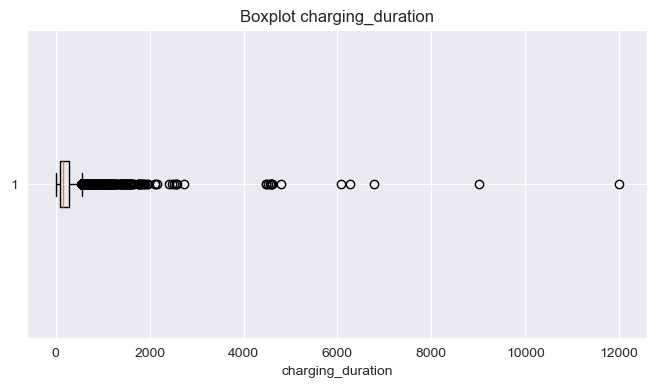

In [68]:
plt.figure(figsize=(8, 4))
plt.boxplot(charging_data_cleaned['charging_duration'], vert=False, patch_artist=False)
plt.title("Boxplot charging_duration")
plt.xlabel("charging_duration")
plt.grid(True)

In [69]:
# Based on the boxplot above we decided that charging durations longer than 2880 minutes or 48 hours (which about matches the last record before the next at about ~4000) are outliers.
unrealistic_charging_duration = charging_data_cleaned[(charging_data_cleaned['charging_duration'] > 2880)]
print(f"Number of records where the charging duration is longer than 2880 minutes (48 hours): {unrealistic_charging_duration.shape[0]}")

Number of records where the charging duration is longer than 2880 minutes (48 hours): 14


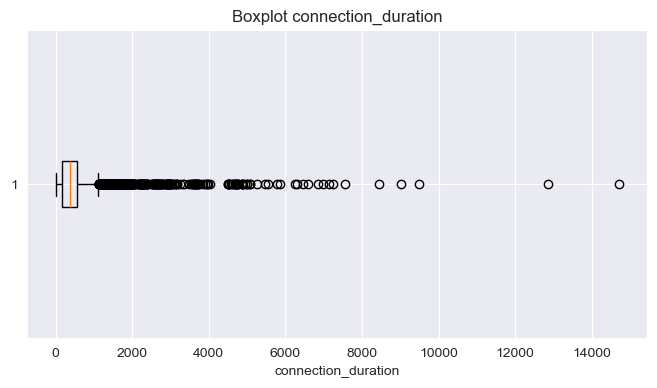

In [70]:
plt.figure(figsize=(8, 4))
plt.boxplot(charging_data_cleaned['connection_duration'], vert=False, patch_artist=False)
plt.title("Boxplot connection_duration")
plt.xlabel("connection_duration")
plt.grid(True)

Based on the boxplot above and to match it to the unrealistic charging durations, we decided that connection durations longer than 2880 minutes or 48 hours are outliers.

In [71]:
unrealistic_connection_duration = charging_data_cleaned[(charging_data_cleaned['connection_duration'] > 2880)]
print(f"Number of records where the connection duration is longer than 2880 minutes (48 hours): {unrealistic_connection_duration.shape[0]}")

Number of records where the connection duration is longer than 2880 minutes (48 hours): 89


In conclusion, we decided to drop the records where charging or connection duration is longer than 2880 minutes (48 hours).

In [72]:
charging_data_cleaned.drop(charging_data_cleaned[charging_data_cleaned['charging_duration'] > 2880].index, inplace=True)
charging_data_cleaned.drop(charging_data_cleaned[charging_data_cleaned['connection_duration'] > 2880].index, inplace=True)

# Verify that the records have been deleted
unrealistic_charging_duration_counter = charging_data_cleaned[(charging_data_cleaned['charging_duration'] > 2880)].shape[0]
unrealistic_connection_duration_counter = charging_data_cleaned[(charging_data_cleaned['connection_duration'] > 2880)].shape[0]
print(f"Number of records where the charging duration is longer than 2880 minutes (48 hours): {unrealistic_charging_duration_counter}")
print(f"Number of records where the connection duration is longer than 2880 minutes (48 hours): {unrealistic_connection_duration_counter}")

Number of records where the charging duration is longer than 2880 minutes (48 hours): 0
Number of records where the connection duration is longer than 2880 minutes (48 hours): 0


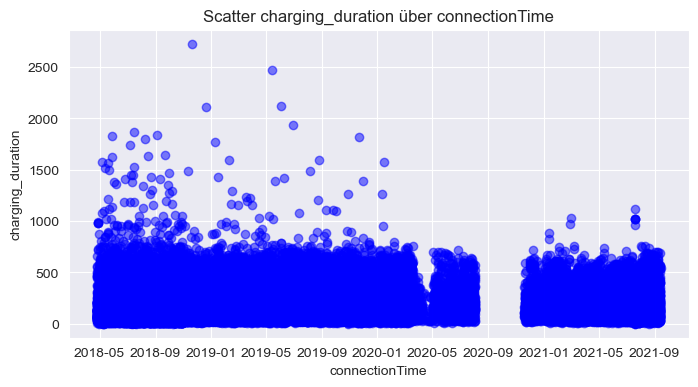

In [73]:
# Just for visual purpose
plt.figure(figsize=(8, 4))
plt.scatter(charging_data_cleaned['connectionTime'], charging_data_cleaned['charging_duration'], c='blue', alpha=0.5,
            label='charging_duration')
plt.title("Scatter charging_duration über connectionTime")
plt.xlabel("connectionTime")
plt.ylabel("charging_duration")
plt.grid(True)

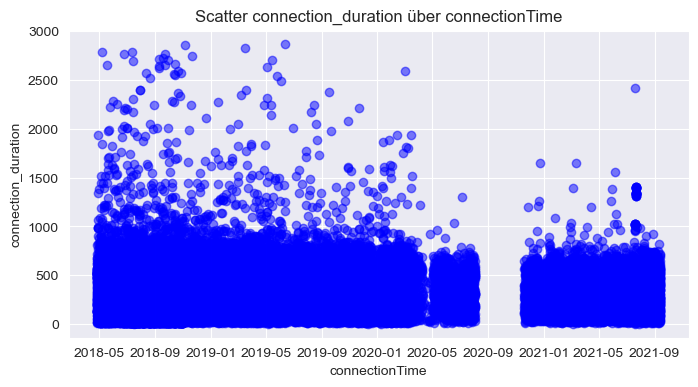

In [74]:
# Just for visual purpose
plt.figure(figsize=(8, 4))
plt.scatter(charging_data_cleaned['connectionTime'], charging_data_cleaned['connection_duration'], c='blue', alpha=0.5,
            label='connection_duration')
plt.title("Scatter connection_duration über connectionTime")
plt.xlabel("connectionTime")
plt.ylabel("connection_duration")
plt.grid(True)

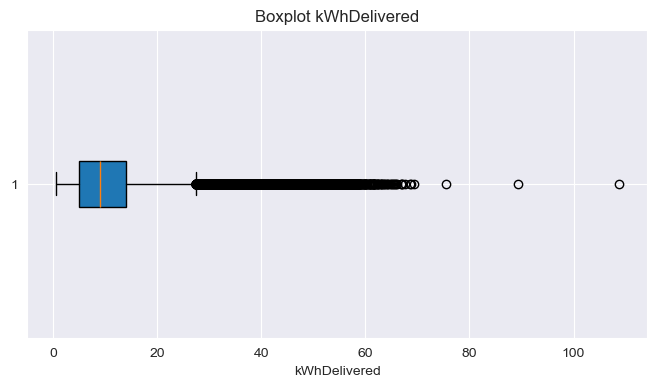

In [75]:
plt.figure(figsize=(8, 4))
plt.boxplot(charging_data_cleaned['kWhDelivered'], vert=False, patch_artist=True)
plt.title("Boxplot kWhDelivered")
plt.xlabel("kWhDelivered")
plt.grid(True)

In [76]:
# TODO: sollen wir den mit 70 vielleicht auch noch mit reinnehmen?
kWhDelivered_outliers = charging_data_cleaned[(charging_data_cleaned['kWhDelivered'] > 80)]
kWhDelivered_outliers

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,connection_date,year_month,charging_duration,connection_duration
18641,4338,610c829df9af8b0580e98730,2021-07-20 15:16:54-07:00,2021-07-21 08:18:03-07:00,2021-07-21 08:18:03-07:00,108.797242,1_1_193_829_2021-07-20 18:27:33.500144,1,AG-1F03,1-1-193-829,America/Los_Angeles,378,2021-07-20,2021-07,1022.100000,1021.150000
18643,4340,610c829df9af8b0580e98732,2021-07-20 15:16:56-07:00,2021-07-21 08:18:16-07:00,2021-07-21 08:18:16-07:00,89.362732,1_1_194_818_2021-07-20 13:54:47.875453,1,AG-1F14,1-1-194-818,America/Los_Angeles,481,2021-07-20,2021-07,1022.283333,1021.333333


We looked at the two data points where the kWhDelivered is ~90 and ~ 110 in detail and notices some inconsistencies. It seems strange to us that the data records start and end at exactly the same moment. As the values 90 and 110 also deviate too much from the other values, we decided to drop those two records to prevent them from influencing our analysis in later steps.

In [77]:
# Drop data records with kWhDelivered greater than 80
charging_data_cleaned = charging_data_cleaned[~(charging_data_cleaned['kWhDelivered'] > 80)]

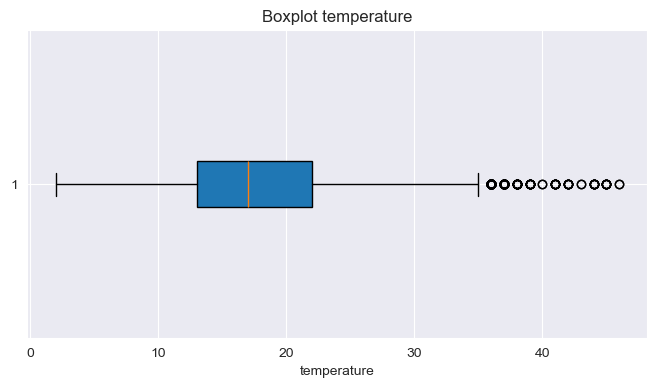

In [78]:
plt.figure(figsize=(8, 4))
plt.boxplot(weather_data_cleaned['temperature'], vert=False, patch_artist=True)
plt.title("Boxplot temperature")
plt.xlabel("temperature")
plt.grid(True)

The boxplot for the temperature doesn't show noticeable outliers, since temperatures of over 35 degrees are common in Los Angeles in the summer.

***

## 5 Final Review

***

## 6 Export Cleaned Data and Merge Datasets

In [79]:
# Export Dataframes as pickle (.pkl) and csv (.csv) files
charging_data_cleaned.to_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data_cleaned.to_pickle(os.path.join('Data', 'weather_data.pkl'))
charging_data_cleaned.to_csv(os.path.join('Data', 'charging_data.csv'))
weather_data_cleaned.to_csv(os.path.join('Data', 'weather_data.csv'))

In [80]:
# TODO: Löschen, falls wir es nicht mehr brauchen
# Export merged charging to weather data dataset

# Sort both datasets by their respective timestamps
charging_data_cleaned = charging_data_cleaned.sort_values(by='connectionTime')
weather_data_cleaned = weather_data_cleaned.sort_values(by='timestamp')

# Perform a nearest merge to align weather data to charging data
merged_data = pd.merge_asof(
    charging_data_cleaned,
    weather_data_cleaned,
    left_on='connectionTime',  # The timestamp in charging data
    right_on='timestamp',      # The timestamp in weather data
    direction='backward'       # Align with the closest earlier weather record
)

# Since we found out at the beginning, that the weather data only ranges until 01-01-2021 and the charging data records after 01-01-2021 would all be joined to this particular weather record which would make no sense, we decided to drop all records after 01-01-2021 from the merged dataset.
merged_data = merged_data[merged_data['connectionTime'] < '2021-01-02']

# Save the merged dataset to a pickle (.pkl) and csv (.csv) file
merged_data.to_pickle(os.path.join('Data', 'merged_charging_weather_data.pkl'))
merged_data.to_csv(os.path.join('Data', 'merged_charging_weather_data.csv'))